## M5 Competition: EDA

In [ ]:
## M5 Competition: EDA

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load data
sales = pd.read_csv('data/sales_train_evaluation.csv')
prices = pd.read_csv('data/sell_prices.csv')
calendar = pd.read_csv('data/calendar.csv', parse_dates=True, index_col='date')

In [ ]:
# Sales data, first 10 rows
sales.head(10)

In [ ]:
# Dimensions of the data
print('\n Size of sales data:' + str(sales.shape))

In [69]:
# Sell prices data, first 10 rows
prices.head(10)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [ ]:
# Summary of sell prices
print(prices.describe())

In [ ]:
# Calendar data, first 10 rows
calendar.head(10)

In [ ]:
# Summary of calendar data
print(calendar.describe())

In [ ]:
# Check datetime object
calendar.info()

### Trends for a single item: FOODS_1_050_WI_2

In [ ]:
# Sales for a single item FOODS_1_050_WI_2 by day number
sales.loc[sales['id']=='FOODS_1_050_WI_2_evaluation']\
.drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
.melt(id_vars = 'id', var_name='d')\
.plot('d','value',title='FOODS_1_050_WI_2')
plt.legend('')

In [ ]:
# Sales for FOODS_1_050_WI_2 by date
sales.loc[sales['id']=='FOODS_1_050_WI_2_evaluation']\
.drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
.melt(id_vars = 'id', var_name='d')\
.merge(calendar.reset_index(), how='left', on='d')\
.set_index('date')\
.plot(y='value',title='FOODS_1_050_WI_2')
plt.legend('')

#### Sales by day of the week, monthly and yearly

In [ ]:
# Sales for FOODS_1_050_WI_2 by day of the week, monthly and yearly

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sales.loc[sales['id']=='FOODS_1_050_WI_2_evaluation']\
.drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
.melt(id_vars = 'id', var_name='d')\
.merge(calendar, how='left', on='d')\
.groupby('wday').mean()\
.plot(y='value', kind='line', title='avg sale: week day', ax=ax1, legend='')

sales.loc[sales['id']=='FOODS_1_050_WI_2_evaluation']\
.drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
.melt(id_vars = 'id', var_name='d')\
.merge(calendar, how='left', on='d')\
.groupby('month').mean()\
.plot(y='value', kind='line', title='avg sale: month', ax=ax2, legend='')

sales.loc[sales['id']=='FOODS_1_050_WI_2_evaluation']\
.drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
.melt(id_vars = 'id', var_name='d')\
.merge(calendar, how='left', on='d')\
.groupby('year').mean()\
.plot(y='value', kind='line', title='avg sale: year', ax=ax3, legend='')

fig.suptitle('FOODS_1_050_WI_2 trends')
plt.show()

### Sales: Randomly Selected 10 Items

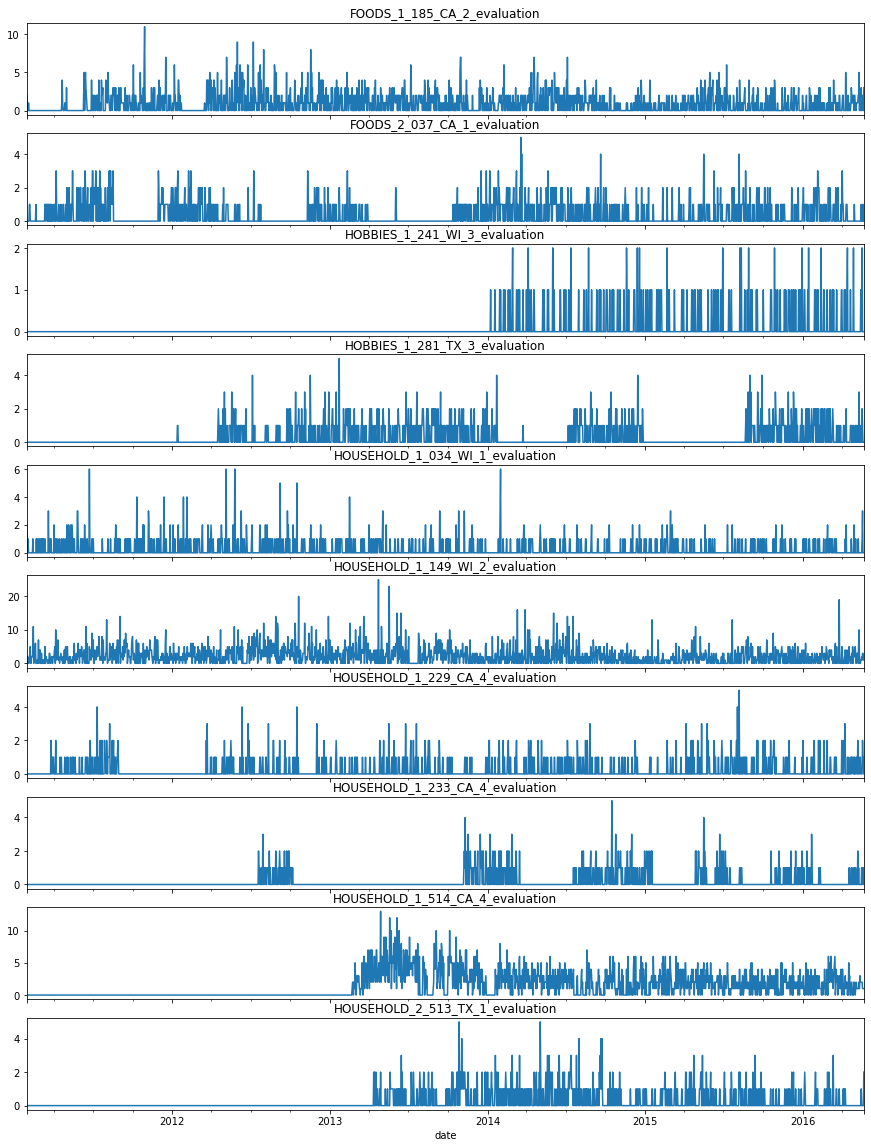

In [66]:
# Sample 10 different items and plot sales by date

# axs=axs.flatten()

# sales.sample(10, random_state = 123)\
# .drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
# .melt(id_vars='id', var_name='d')\
# .merge(calendar, how='left', on='d')\
# .drop(columns=['wm_yr_wk','weekday','wday','month','year','event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI'])\
# .groupby('id')\
# .plot(x='date', y='value', kind='line', ax=axs)
# plt.show()

sample_10 = pd.DataFrame(sales.sample(10, random_state = 123))\
.drop(columns=['item_id','dept_id','cat_id','store_id','state_id'])\
.melt(id_vars='id', var_name='d')\
.merge(calendar.reset_index(), how='left', on='d')\
.set_index('date')\
.drop(columns=['wm_yr_wk','weekday','wday','month','year','event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI'])\
.groupby('id')

fig, axs=plt.subplots(sample_10.ngroups, sharex=True, figsize=(15,20))

for i, (item,d) in enumerate(sample_10):
    ax = d.plot(y='value', ax=axs[i], title=item, legend='')

# fig.tight_layout()
plt.show()

### Sales by State

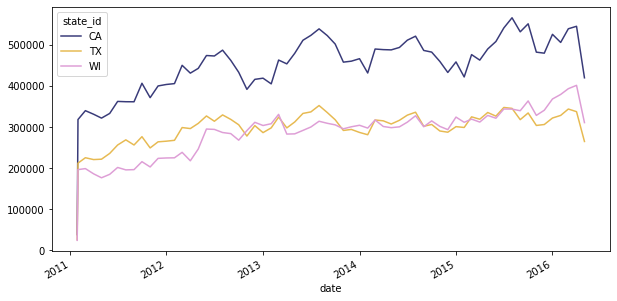

In [71]:
# Sales by State

# Bar plot
# sales.groupby('state_id').count()['id']\
# .sort_values()\
# .plot(kind='bar', title='Count by State')
# plt.show()

# Line plot
sales.drop(columns=['item_id','dept_id','cat_id','store_id'])\
.melt(id_vars=['id', 'state_id'], var_name='d')\
.merge(calendar.reset_index()[['date','month','year','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['state_id','year','month'])\
.agg({'value':'sum', 'date':'min'})\
.reset_index()\
.set_index(['state_id','date'])\
.unstack(level='state_id')\
.plot(y='value', kind='line', colormap='tab20b', figsize=(10,5))
plt.show()


### Sales by Item Category

In [ ]:
# Sales by Category
# Bar plot
sales.groupby('cat_id')\
.agg({'id':'count'})\
.T\
.plot(kind='bar', title='Count by Category', colormap='tab20b')

In [ ]:
# Sales by Category
# Line plot 
sales.drop(columns=['item_id','dept_id','state_id','store_id'])\
.melt(id_vars=['id', 'cat_id'], var_name='d')\
.merge(calendar.reset_index()[['date','month','year','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['month','year','cat_id'])\
.agg({'value':'sum', 'date':'min'})\
.reset_index()\
.set_index(['cat_id','date'])\
.unstack(level='cat_id')\
.plot(y='value', kind='line', colormap='tab20b', figsize=(10,5), title='Total Sales by Item Category')
plt.show()

### Sales by Store
There are 10 unique stores: 4 in CA, 3 in TX and 3 in WI

In [ ]:
# Total Sales by Store
sales.drop(columns=['item_id','dept_id','state_id','cat_id'])\
.melt(id_vars=['id', 'store_id'], var_name='d')\
.merge(calendar.reset_index()[['date','month','year','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['month','year','store_id'])\
.agg({'value':'sum', 'date':'min'})\
.reset_index()\
.set_index(['store_id','date'])\
.unstack(level='store_id')\
.plot(y='value', kind='line', colormap='nipy_spectral', figsize=(10,5), title='Total Sales by Store')
plt.show()

#### 90-day average total sales for each store.

In [ ]:
# 90-day rolling Sales by Store
sales.drop(columns=['item_id','dept_id','state_id','cat_id'])\
.melt(id_vars=['id', 'store_id'], var_name='d')\
.merge(calendar.reset_index()[['date','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['store_id','date']).sum()\
.unstack(level='store_id')\
.rolling(window=90).mean()\
.plot(kind='line', colormap='nipy_spectral', figsize=(10,5))
plt.show()

# .unstack(level='store_id')\
# .plot(kind='line', colormap='Paired')
# plt.show()

#### Weekly average total sales for each store.

In [ ]:
# 7-day rolling sales by store
sales.drop(columns=['item_id','dept_id','state_id','cat_id'])\
.melt(id_vars=['id', 'store_id'], var_name='d')\
.merge(calendar.reset_index()[['date','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['store_id','date']).sum()\
.unstack(level='store_id')\
.rolling(window=7).mean()\
.plot(kind='line', colormap='nipy_spectral', subplots=True, layout=(5,2), figsize=(15,10))
plt.show()

### Sales by Department
There are 7 unique departments: 3 in foods, 2 in hobbies and 2 in households. 

In [ ]:
# Total Sales by department
sales.drop(columns=['item_id','store_id','state_id','cat_id'])\
.melt(id_vars=['id', 'dept_id'], var_name='d')\
.merge(calendar.reset_index()[['date','month','year','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['month','year','dept_id'])\
.agg({'value':'sum', 'date':'min'})\
.reset_index()\
.set_index(['dept_id','date'])\
.unstack(level='dept_id')\
.plot(y='value', kind='line', colormap='gist_rainbow', figsize=(10,5))
plt.show()

#### 90-day average sales for each department
Foods_3 and Households_2 shows a cycle. Other departments are quite flat.

In [ ]:
# 90-day rolling Sales by department
sales.drop(columns=['item_id','store_id','state_id','cat_id'])\
.melt(id_vars=['id', 'dept_id'], var_name='d')\
.merge(calendar.reset_index()[['date','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['dept_id','date']).sum()\
.unstack(level='dept_id')\
.rolling(window=90).mean()\
.plot(kind='line', colormap='gist_rainbow', figsize=(10,5))
plt.show()

#### Weekly average sales for each department


In [ ]:
# 7-day rolling sales by department
sales.drop(columns=['item_id','store_id','state_id','cat_id'])\
.melt(id_vars=['id', 'dept_id'], var_name='d')\
.merge(calendar.reset_index()[['date','d']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['dept_id','date']).sum()\
.unstack(level='dept_id')\
.rolling(window=7).mean()\
.plot(kind='line', colormap='gist_rainbow', subplots=True, layout=(5,2), figsize=(15,10))
plt.show()

### Heatmaps 

#### Total Sales, Month vs Day of Week

In [ ]:
## Arrange total sales by weekday, month, year
sns.heatmap(sales.drop(columns=['item_id','store_id','state_id','dept_id','cat_id'])\
.melt(id_vars=['id'], var_name='d')\
.merge(calendar.reset_index()[['weekday', 'month', 'd']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['weekday', 'month'])\
.agg({'value':'sum'})\
.reset_index()\
.pivot_table(index='weekday', columns='month', values='value')
           )


# corrmat.head()

#### By Item Categories: Month vs Day of the Week

In [ ]:
## Arrange category sales by weekday, month
sns.heatmap(sales.drop(columns=['item_id','store_id','state_id','dept_id'])\
.melt(id_vars=['id','cat_id'], var_name='d')\
.merge(calendar.reset_index()[['weekday', 'month', 'd']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['weekday', 'month','cat_id'])\
.agg({'value':'sum'})\
.reset_index()\
.pivot_table(index='weekday', columns=['cat_id','month'], values='value'),
           cmap=sns.cubehelix_palette(8))
plt.show()
# .head(20)

#### By State: Month vs Day of the Week

In [ ]:
## Arrange state sales by weekday, month
sns.heatmap(sales.drop(columns=['item_id','store_id','cat_id','dept_id'])\
.melt(id_vars=['id','state_id'], var_name='d')\
.merge(calendar.reset_index()[['weekday', 'month', 'd']], how='left', on='d')\
.drop(columns=['id','d'])\
.groupby(['weekday', 'month','state_id'])\
.agg({'value':'sum'})\
.reset_index()\
.pivot_table(index='weekday', columns=['state_id','month'], values='value'),
           cmap=sns.cubehelix_palette(8))
plt.show()

### Sell Price Trends

#### FOODS_1_050

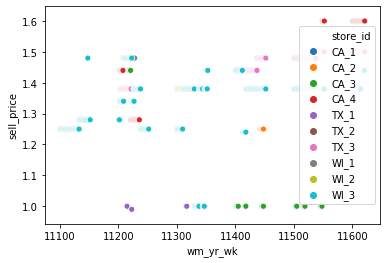

In [65]:
# FOODS_3_090 by date
# prices.loc[prices['item_id']=='FOODS_1_050']\
# .head(20)

sns.scatterplot(x=prices.loc[prices['item_id']=='FOODS_3_090']['wm_yr_wk'],
               y=prices.loc[prices['item_id']=='FOODS_3_090']['sell_price'],
               hue=prices.loc[prices['item_id']=='FOODS_3_090']['store_id'],
               data=prices.loc[prices['item_id']=='FOODS_3_090'])
plt.show()

#### HOBBIES_1_281

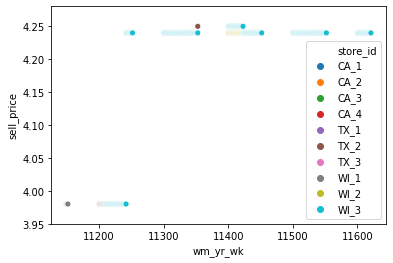

In [67]:
sns.scatterplot(x=prices.loc[prices['item_id']=='HOBBIES_1_281']['wm_yr_wk'],
               y=prices.loc[prices['item_id']=='HOBBIES_1_281']['sell_price'],
               hue=prices.loc[prices['item_id']=='HOBBIES_1_281']['store_id'],
               data=prices.loc[prices['item_id']=='HOBBIES_1_281'])
plt.show()

#### FOODS_2_037

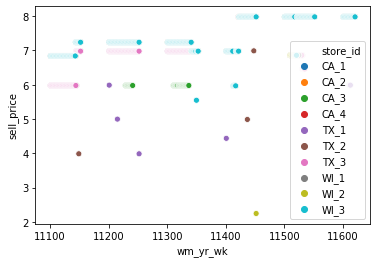

In [70]:
sns.scatterplot(x=prices.loc[prices['item_id']=='FOODS_2_037']['wm_yr_wk'],
               y=prices.loc[prices['item_id']=='FOODS_2_037']['sell_price'],
               hue=prices.loc[prices['item_id']=='FOODS_2_037']['store_id'],
               data=prices.loc[prices['item_id']=='FOODS_2_037'])
plt.show()

#### Price Distribution by Categories

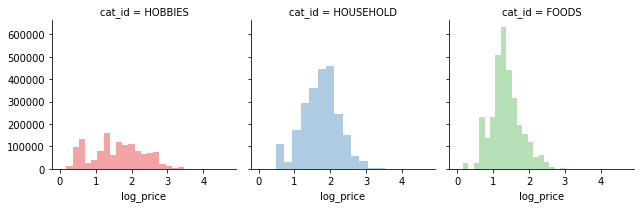

In [107]:
# prices['cat_id'] = prices['item_id'].str.split('_', expand=True)[0]
# prices['log_price'] = prices['sell_price'].apply(np.log1p)

# prices[['log_price', 'cat_id']].groupby('cat_id')\
# .plot(y='log_price', kind='hist', bins=20, subplots=True, colormap='tab20b', figsize=(10,5), legend='')
# plt.show()

# g = sns.FacetGrid(df, col='cols', hue="target", palette="Set1")
# g = (g.map(sns.distplot, "vals", hist=False, rug=True))

g = sns.FacetGrid(prices, col='cat_id', hue='cat_id', palette="Set1")
g = (g.map(sns.distplot, "log_price", bins=20, rug=False, kde=False))
